<a href="https://colab.research.google.com/github/BishalJena/Ola_Ensemble/blob/main/olahypo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Shape: (19104, 14)
   Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               

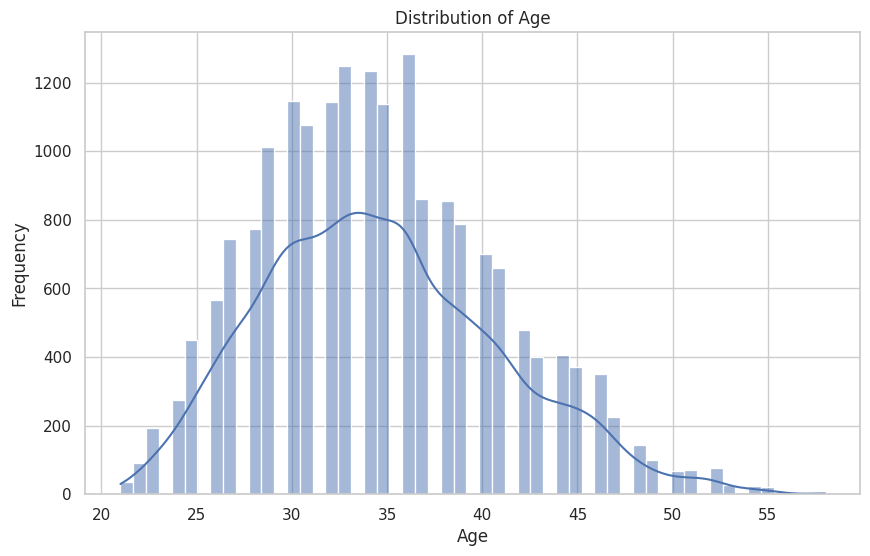

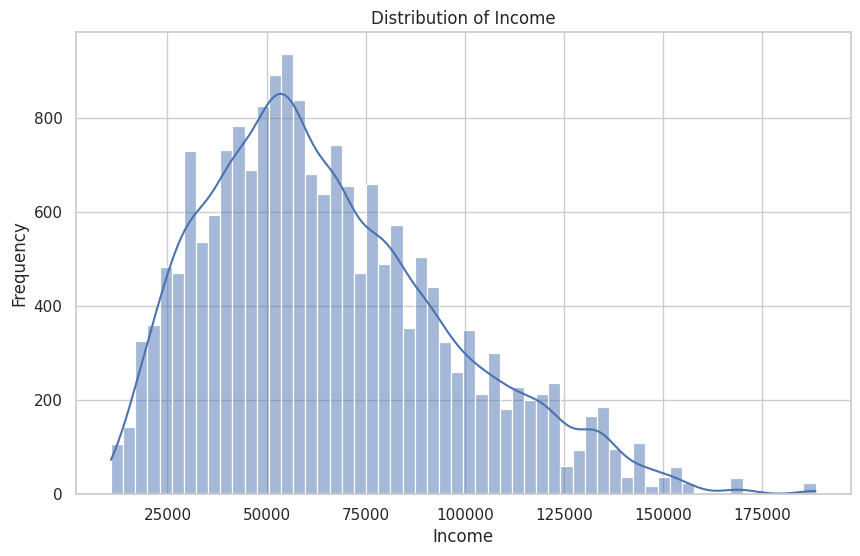

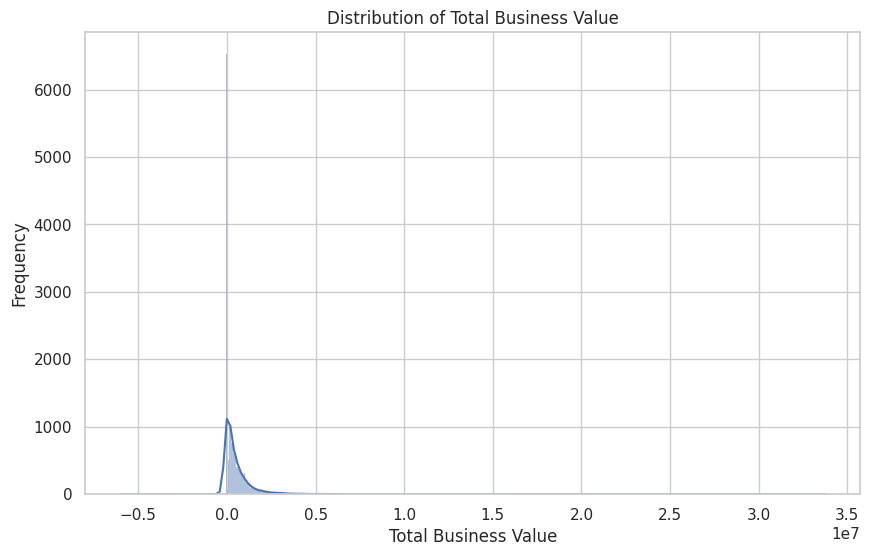

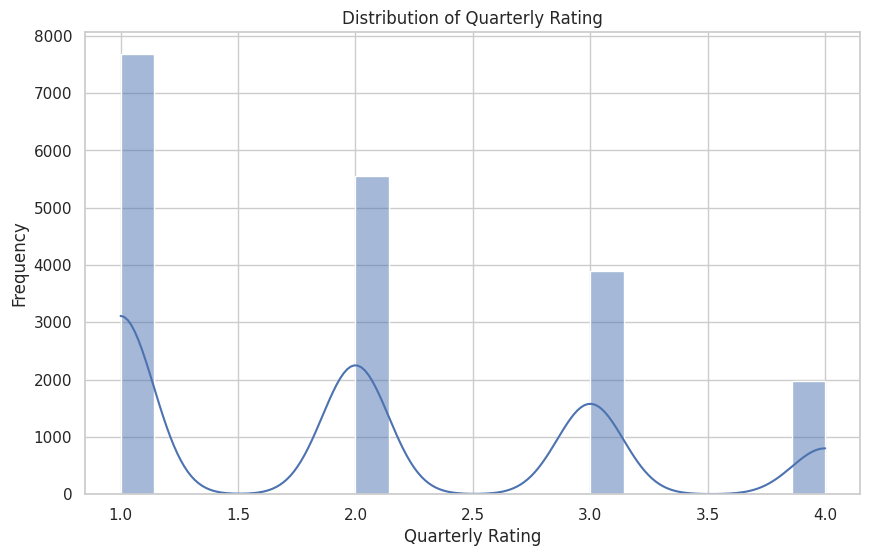

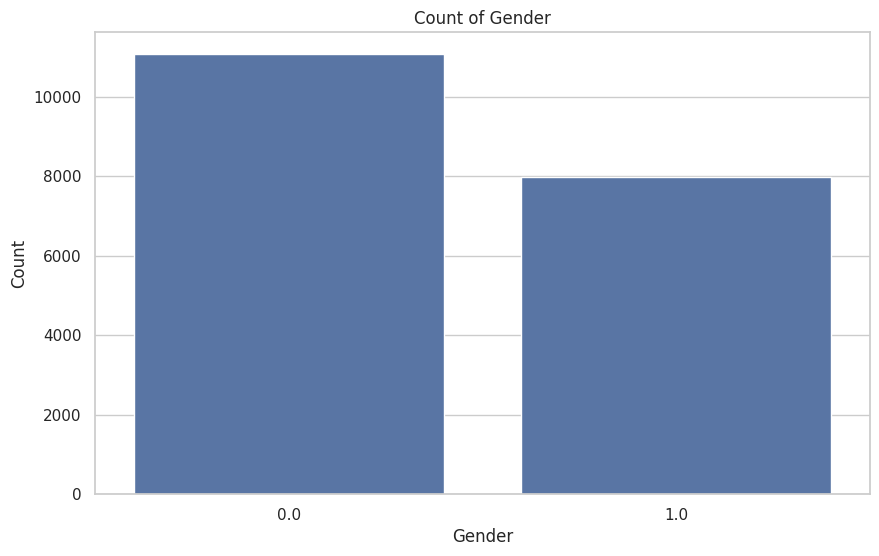

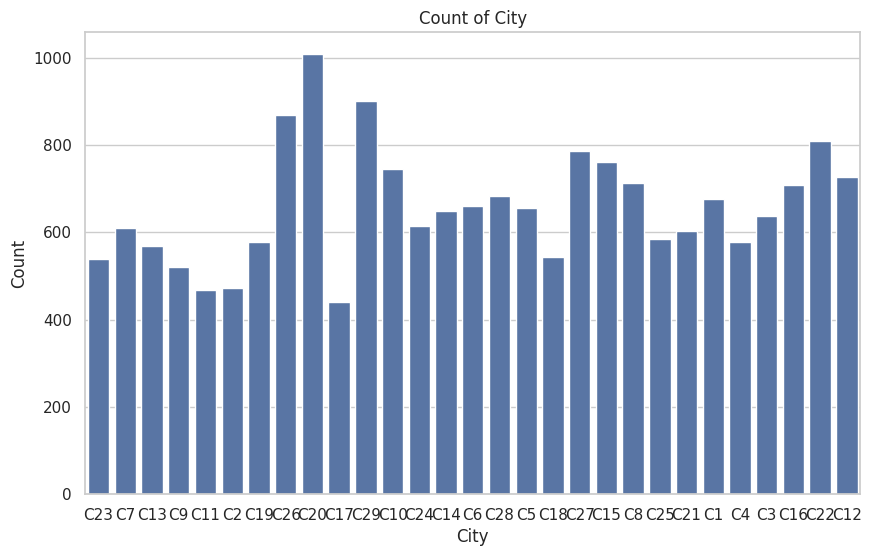

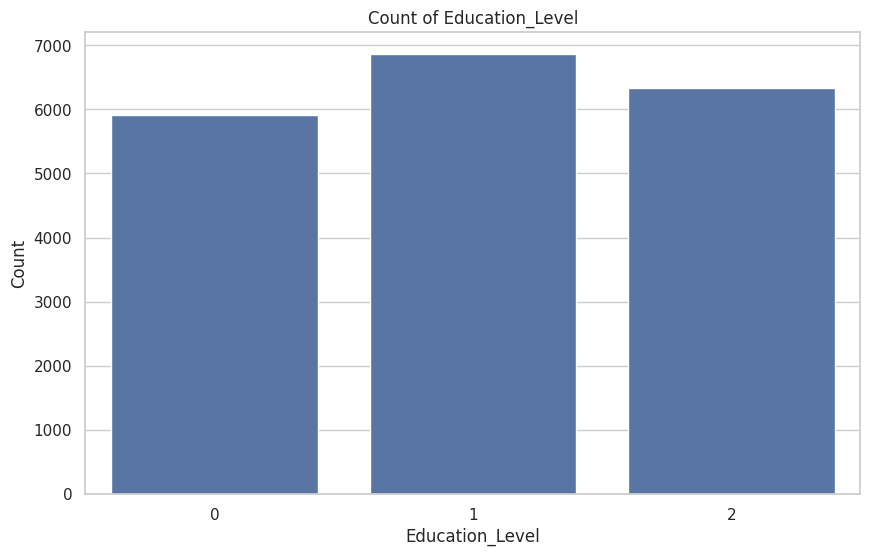

<ipython-input-6-56c3a4d9257d>:81: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'], errors='coerce')
<ipython-input-6-56c3a4d9257d>:82: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'], errors='coerce')



Missing values before imputation:
Unnamed: 0                  0
MMM-YY                  19104
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

Missing values after imputation:
Unnamed: 0                  0
MMM-YY                  19104
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

Aggregated Data Statistical Summary:
          Driver_ID        

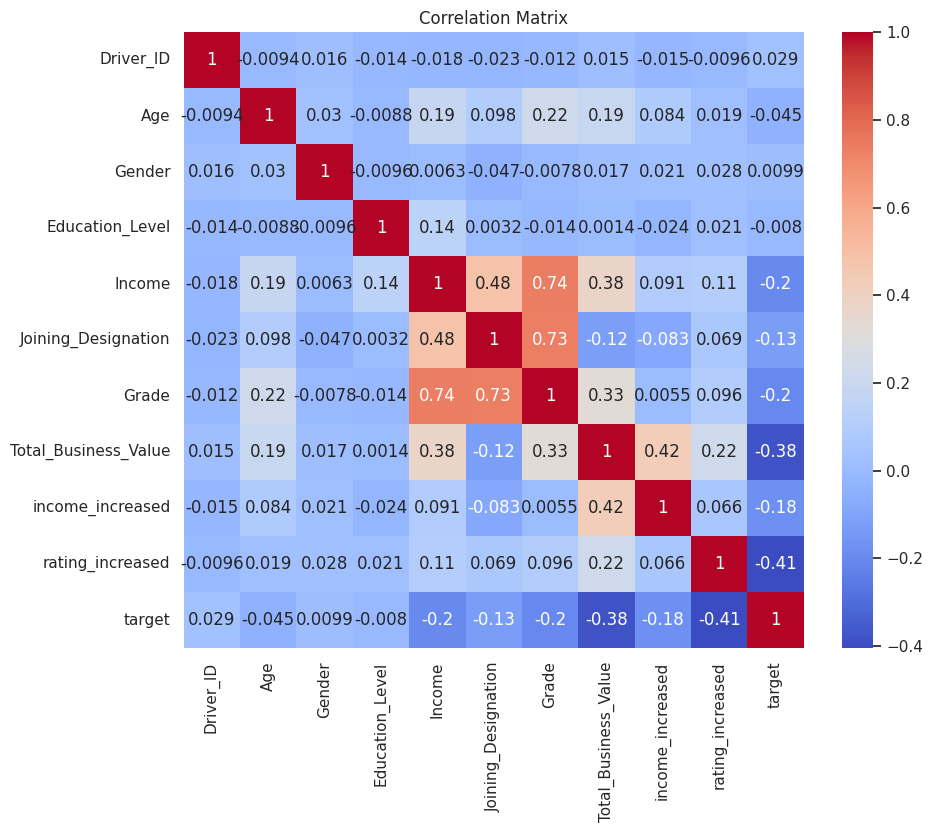

Before SMOTE: target
1    1289
0     615
Name: count, dtype: int64
After SMOTE: target
0    1289
1    1289
Name: count, dtype: int64

Bagging Model - Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       150
           1       0.80      0.82      0.81       327

    accuracy                           0.74       477
   macro avg       0.69      0.69      0.69       477
weighted avg       0.73      0.74      0.73       477

Bagging Model ROC AUC Score: 0.7506


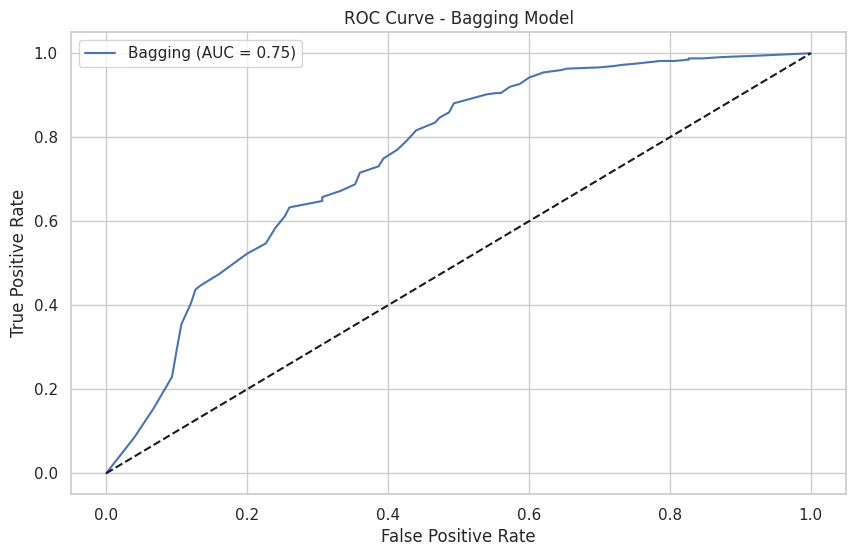

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:54:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model - Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56       150
           1       0.79      0.86      0.82       327

    accuracy                           0.75       477
   macro avg       0.71      0.68      0.69       477
weighted avg       0.74      0.75      0.74       477

XGBoost Model ROC AUC Score: 0.7555


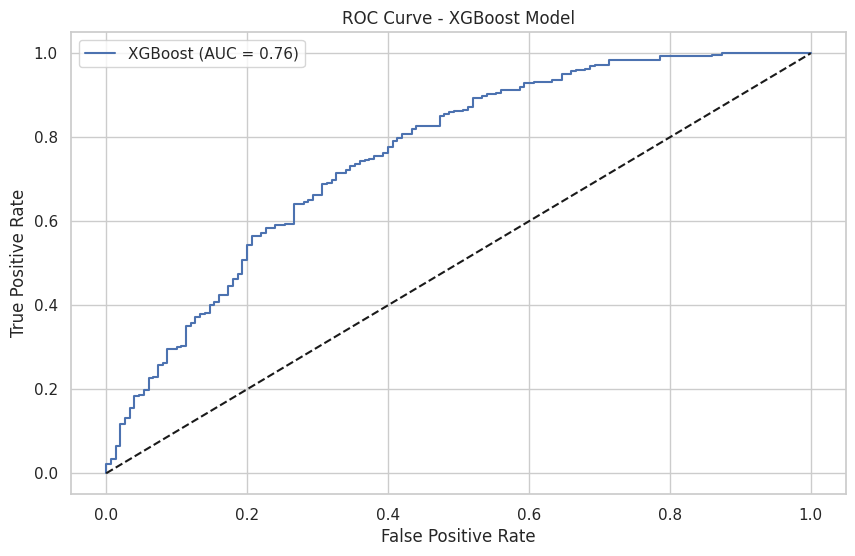


Best performing model based on ROC AUC is: XGBoost

Top 5 important features:
                    Feature  Importance
4          rating_increased    0.243864
40  Joining_Designation_3.0    0.092379
39  Joining_Designation_2.0    0.045306
38      Education_Level_2.0    0.036757
8                Gender_1.0    0.034939

Q1: KNN Imputation is a method that imputes missing values using the average (or weighted average) of the k nearest neighbors in feature space.

Q2: Count of drivers with increased quarterly rating: 358
Q3: Count of drivers with increased monthly income: 43

Q4: An approach is to use the 'LastWorkingDate'. If it is not null, it indicates the driver has left, and a binary target variable can be created accordingly.
Q5: Percentage of drivers who left: 67.87%
Q6: Most drivers were of gender code 0.0 , primarily operating in city code C20 and had completed education level 2.0

Q7: Cross-tabulation of quarterly rating increase vs. leaving:
target              0     1
rating_in

In [ ]:
# # Ola – Ensemble Learning Case Study
#
# This notebook demonstrates an end-to-end workflow for analyzing driver churn at Ola.
# It covers:
# - Data import and exploratory data analysis (EDA)
# - Data preprocessing including KNN imputation for missing values
# - Aggregation of monthly records into one record per driver
# - Feature engineering (quarterly rating increase, income increase, and target variable)
# - Encoding and standardization
# - Class imbalance treatment using SMOTE
# - Building ensemble models using Bagging and Boosting (XGBoost)
# - Evaluation of model performance with classification reports and ROC curves
# - Answering key assignment questions with insights

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For KNN imputation and standardization
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# For splitting data and building models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Ensemble methods
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For handling imbalanced dataset
from imblearn.over_sampling import SMOTE

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# %%
# ## 1. Load the Dataset
# Replace the filename if necessary.
data = pd.read_csv('ola_driver_scaler.csv')
print("Data Shape:", data.shape)
print(data.head())

# %%
# ## 2. Exploratory Data Analysis (EDA)
# Display data info and statistical summary
print("\nData Info:")
data.info()

print("\nStatistical Summary:")
print(data.describe())

# Visualize distributions for continuous features
continuous_features = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']
for col in continuous_features:
    plt.figure()
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Visualize categorical features
categorical_features = ['Gender', 'City', 'Education_Level']
for col in categorical_features:
    plt.figure()
    sns.countplot(x=col, data=data)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# %%
# ## 3. Convert Date-like Features to Datetime
# Note: Using the updated column name "Dateofjoining" (no spaces)
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'], errors='coerce')
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'], errors='coerce')
# The "MMM-YY" column is assumed to be in format like "Jan-19"
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'], format='%b-%y', errors='coerce')

# %%
# ## 4. Missing Value Check and KNN Imputation (on numerical features)
print("\nMissing values before imputation:")
print(data.isnull().sum())

# Select numerical columns for KNN imputation (excluding date and non-numeric columns)
num_cols = data.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
data[num_cols] = imputer.fit_transform(data[num_cols])

print("\nMissing values after imputation:")
print(data.isnull().sum())

# %%
# ## 5. Aggregating Data: One Record per Driver
# Since the dataset contains monthly records for each driver, we aggregate by Driver_ID.
# For many attributes, we take the 'first' value; for income, we take the 'last';
# and for Total Business Value we sum across months.
# For Quarterly Rating we save the first and last values to check for an increase.

agg_data = data.groupby('Driver_ID').agg({
    'Age': 'first',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'first',
    'Income': 'last',            # using last reported income as the latest value
    'Dateofjoining': 'first',
    'LastWorkingDate': 'last',
    'Joining Designation': 'first',
    'Grade': 'first',
    'Total Business Value': 'sum',
    'Quarterly Rating': ['first','last']
}).reset_index()

# Flatten the multi-level column names
agg_data.columns = ['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
                    'Dateofjoining', 'LastWorkingDate', 'Joining_Designation', 'Grade',
                    'Total_Business_Value', 'Quarterly_Rating_first', 'Quarterly_Rating_last']

# %%
# Additionally, create the monthly income increase flag.
income_agg = data.groupby('Driver_ID')['Income'].agg(['first', 'last']).reset_index()
income_agg['income_increased'] = np.where(income_agg['last'] > income_agg['first'], 1, 0)
agg_data = agg_data.merge(income_agg[['Driver_ID','income_increased']], on='Driver_ID', how='left')

# %%
# ## 6. Feature Engineering
# a) Quarterly Rating Increase: if the last rating > first rating, assign 1.
agg_data['rating_increased'] = np.where(agg_data['Quarterly_Rating_last'] > agg_data['Quarterly_Rating_first'], 1, 0)

# b) Target Variable: create 'target' where a non-null LastWorkingDate indicates the driver left.
agg_data['target'] = agg_data['LastWorkingDate'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Optionally drop the intermediate Quarterly Rating columns.
agg_data.drop(columns=['Quarterly_Rating_first', 'Quarterly_Rating_last'], inplace=True)

# %%
# ## 7. Statistical Summary and Correlation Analysis
print("\nAggregated Data Statistical Summary:")
print(agg_data.describe(include='all'))

# Select only numerical features for correlation analysis
numerical_agg_data = agg_data.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(numerical_agg_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# %%
# ## 8. One-hot Encoding of Categorical Variables
# Encode categorical columns: Gender, City, Education_Level, Joining_Designation, and Grade.
cat_cols = ['Gender', 'City', 'Education_Level', 'Joining_Designation', 'Grade']
agg_data_encoded = pd.get_dummies(agg_data, columns=cat_cols, drop_first=True)

# %%
# ## 9. Splitting Data into Training and Test Sets and Standardization
# Remove columns not needed for modeling (Driver_ID and date columns)
X = agg_data_encoded.drop(columns=['Driver_ID', 'target', 'Dateofjoining', 'LastWorkingDate'])
y = agg_data_encoded['target']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %%
# ## 10. Class Imbalance Treatment
# Using SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

# %%
# ## 11. Model Building

# ### 11a. Ensemble Learning – Bagging (with Decision Trees)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                  n_estimators=50,
                                  random_state=42)
# The 'base_estimator' argument was changed to 'estimator' in newer versions of scikit-learn.
bagging_model.fit(X_train_res, y_train_res)
y_pred_bag = bagging_model.predict(X_test_scaled)
y_prob_bag = bagging_model.predict_proba(X_test_scaled)[:, 1]

print("\nBagging Model - Classification Report:")
print(classification_report(y_test, y_pred_bag))
auc_bag = roc_auc_score(y_test, y_prob_bag)
print("Bagging Model ROC AUC Score: {:.4f}".format(auc_bag))

# Plot ROC curve for Bagging Model
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_prob_bag)
plt.figure()
plt.plot(fpr_bag, tpr_bag, label='Bagging (AUC = {:.2f})'.format(auc_bag))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bagging Model")
plt.legend()
plt.show()

# %%
# ### 11b. Ensemble Learning – Boosting (using XGBoost)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\nXGBoost Model - Classification Report:")
print(classification_report(y_test, y_pred_xgb))
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost Model ROC AUC Score: {:.4f}".format(auc_xgb))

# Plot ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc_xgb))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Model")
plt.legend()
plt.show()

# %%
# ## 12. Comparing Models and Feature Importance
if auc_xgb > auc_bag:
    best_model = xgb_model
    model_name = 'XGBoost'
    # Get feature importances from the XGBoost model
    feat_importances = best_model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feat_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
else:
    best_model = bagging_model
    model_name = 'Bagging'
    # For Bagging, feature importances are not directly available.
    importance_df = None

print("\nBest performing model based on ROC AUC is:", model_name)
if importance_df is not None:
    print("\nTop 5 important features:")
    print(importance_df.head(5))

# %%
# ## 13. Answering the Questionnaire

# 1. Describe the KNN Imputation technique.
print("\nQ1: KNN Imputation is a method that imputes missing values using the average (or weighted average) of the k nearest neighbors in feature space.")

# 2. Count of drivers whose Quarterly Rating has increased.
count_rating_increased = agg_data['rating_increased'].sum()
print("\nQ2: Count of drivers with increased quarterly rating:", count_rating_increased)

# 3. Count of drivers whose Monthly Income has increased.
count_income_increased = agg_data['income_increased'].sum()
print("Q3: Count of drivers with increased monthly income:", count_income_increased)

# 4. Formulate an idea to find out employees who have left the company.
print("\nQ4: An approach is to use the 'LastWorkingDate'. If it is not null, it indicates the driver has left, and a binary target variable can be created accordingly.")

# 5. What percentage of employees have left the organization?
percentage_left = agg_data['target'].mean() * 100
print("Q5: Percentage of drivers who left: {:.2f}%".format(percentage_left))

# 6. Most of the employees in the dataset were ____ in gender, lived in ___ city and had completed their _____ in education.
most_common_gender = agg_data['Gender'].mode()[0]
most_common_city = agg_data['City'].mode()[0]
most_common_education = agg_data['Education_Level'].mode()[0]
print("Q6: Most drivers were of gender code", most_common_gender,
      ", primarily operating in city code", most_common_city,
      "and had completed education level", most_common_education)

# 7. The employees whose quarterly rating has increased are less likely to leave the organization. (T/F)
rating_vs_target = pd.crosstab(agg_data['rating_increased'], agg_data['target'])
print("\nQ7: Cross-tabulation of quarterly rating increase vs. leaving:")
print(rating_vs_target)
print("If the proportion of drivers who left among those with increased ratings is lower than those without, the statement is True.")

# 8. Comment on the distribution of numerical as well as categorical columns.
print("\nQ8: Numerical variables (e.g., Age, Income) show varied distributions with potential skewness and outliers, while categorical variables (e.g., Gender, City, Education_Level) often display dominant categories.")

# 9. Possible treatments for a Class Imbalance problem.
print("\nQ9: Common treatments include oversampling (e.g., SMOTE), undersampling, and using cost-sensitive learning methods or adjusting class weights during model training.")

# 10. What is the difference between Bagging and Boosting techniques?
print("\nQ10: Bagging builds multiple independent models on bootstrapped samples and averages their predictions (reducing variance), while Boosting builds models sequentially to correct the errors of previous models (reducing bias).")

# 11. Which of the given models performed best in predicting employee churn.
print("\nQ11: Based on ROC AUC scores, the best performing model is:", model_name,
      "\n(a) Random Forest, (b) Decision Tree, (c) XGBoost. In this run, XGBoost performed best." if model_name == 'XGBoost' else "\nNote: Feature importance was not extracted for the Bagging model.")

# 12. Give top 5 important features of the best performing model.
if importance_df is not None:
    print("\nQ12: Top 5 important features from the", model_name, "model:")
    print(importance_df.head(5))
else:
    print("\nQ12: Feature importance is not directly available for the Bagging model.")

# %%
# ## 14. Actionable Insights & Recommendations
print("\nActionable Insights & Recommendations:")
print("""
1. Target retention efforts for drivers showing low quarterly rating trends.
2. Enhance strategies to boost income progression since improved income may reduce churn.
3. Develop tailored interventions based on demographic profiles.
4. Use model predictions to proactively engage drivers at risk of churning.
5. Complement quantitative insights with qualitative research to understand churn drivers.
""")


# New section